In [1]:
import numpy as np
import os
BASE_PATH = "/home/mckros/kitti/RawData/2011_09_26/2011_09_26_drive_0005_sync/"    


In [2]:
# 读点云数据
def read_point_cloud():
    point_cloud = np.fromfile(os.path.join(BASE_PATH, "velodyne_points/data/%010d.bin"%0), dtype=np.float32).reshape(-1,4)
    return point_cloud

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def draw_point_cloud(ax, points, title, axes=[0, 1, 2], point_size=0.2, xlim3d=None, ylim3d=None, zlim3d=None):
    """
    Convenient method for drawing various point cloud projections as a part of frame statistics.
    """
    # 设置xyz三个轴的点云范围
    axes_limits = [
        [-20, 80], # X axis range
        [-20, 20], # Y axis range
        [-3, 5]    # Z axis range
    ]
    axes_str = ['X', 'Y', 'Z']
    # 禁止显示背后的网格
    ax.grid(False)
    # 创建散点图[1]:xyz数据集，[2]:点云的大小，[3]:点云的反射率数据,[4]:为灰度显示
    ax.scatter(*np.transpose(points[:, axes]), s=point_size, c=points[:, 3], cmap='gray')
    # 设置画板的标题
    ax.set_title(title)
    # 设置x轴标题
    ax.set_xlabel('{} axis'.format(axes_str[axes[0]]))
    # 设置y轴标题
    ax.set_ylabel('{} axis'.format(axes_str[axes[1]]))
    if len(axes) > 2:
        # 设置限制角度
        ax.set_xlim3d(*axes_limits[axes[0]])
        ax.set_ylim3d(*axes_limits[axes[1]])
        ax.set_zlim3d(*axes_limits[axes[2]])
        # 将背景颜色设置为RGBA格式
        ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        # 设置z轴标题
        ax.set_zlabel('{} axis'.format(axes_str[axes[2]]))
    else:
        # 2D限制角度，只有xy轴
        ax.set_xlim(*axes_limits[axes[0]])
        ax.set_ylim(*axes_limits[axes[1]])
    # User specified limits
    if xlim3d!=None:
        ax.set_xlim3d(xlim3d)
    if ylim3d!=None:
        ax.set_ylim3d(ylim3d)
    if zlim3d!=None:
        ax.set_zlim3d(zlim3d)

In [5]:
def draw_box(ax, vertices, axes=[0, 1, 2], color='black'):
    """
    Draws a bounding 3D box in a pyplot axis.
    
    Parameters
    ----------
    pyplot_axis : Pyplot axis to draw in.
    vertices    : Array 8 box vertices containing x, y, z coordinates.
    axes        : Axes to use. Defaults to `[0, 1, 2]`, e.g. x, y and z axes.
    color       : Drawing color. Defaults to `black`.
    """
    vertices = vertices[axes, :]
    connections = [
        [0, 1], [1, 2], [2, 3], [3, 0],  # Lower plane parallel to Z=0 plane
        [4, 5], [5, 6], [6, 7], [7, 4],  # Upper plane parallel to Z=0 plane
        [0, 4], [1, 5], [2, 6], [3, 7]  # Connections between upper and lower planes
    ]
    for connection in connections:
        ax.plot(*vertices[:, connection], c=color, lw=0.5)


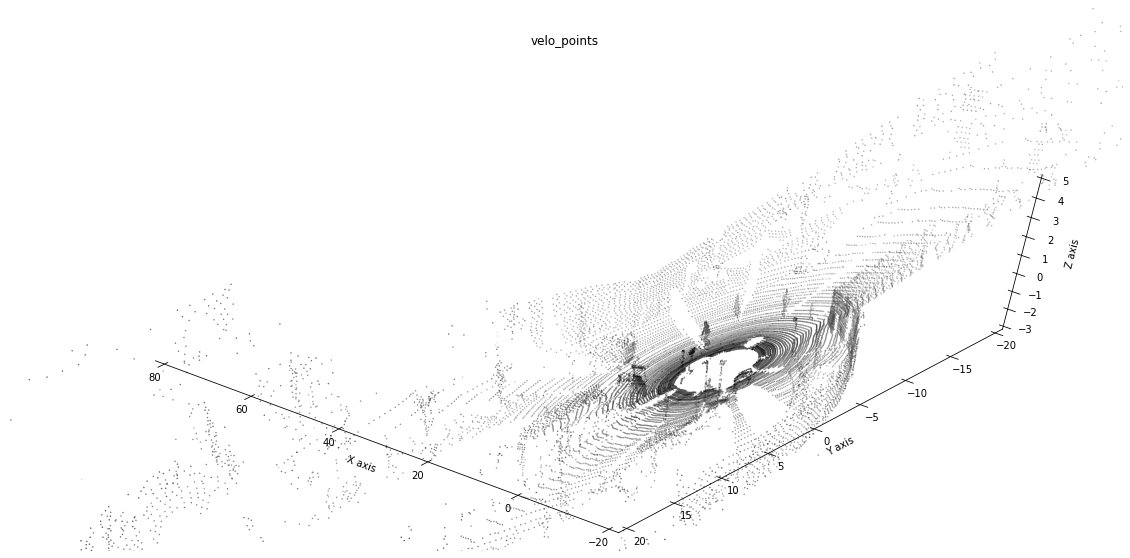

In [6]:
# 获取数据集中的点云数据
point_cloud = read_point_cloud()
# 绘制3D点云数据，创建一个大小为20*10的图形画板
fig = plt.figure(figsize=(20, 10))
# 在画板中添加1*1的网格的第一个子图，为3D图像
ax = fig.add_subplot(111, projection='3d')
# 改变绘制图像的视角，即相机的位置，elev为Z轴角度，azim为(x,y)角度
ax.view_init(60,130)
# 在画板中画出点云显示数据
draw_point_cloud(ax, point_cloud[::5], "velo_points")


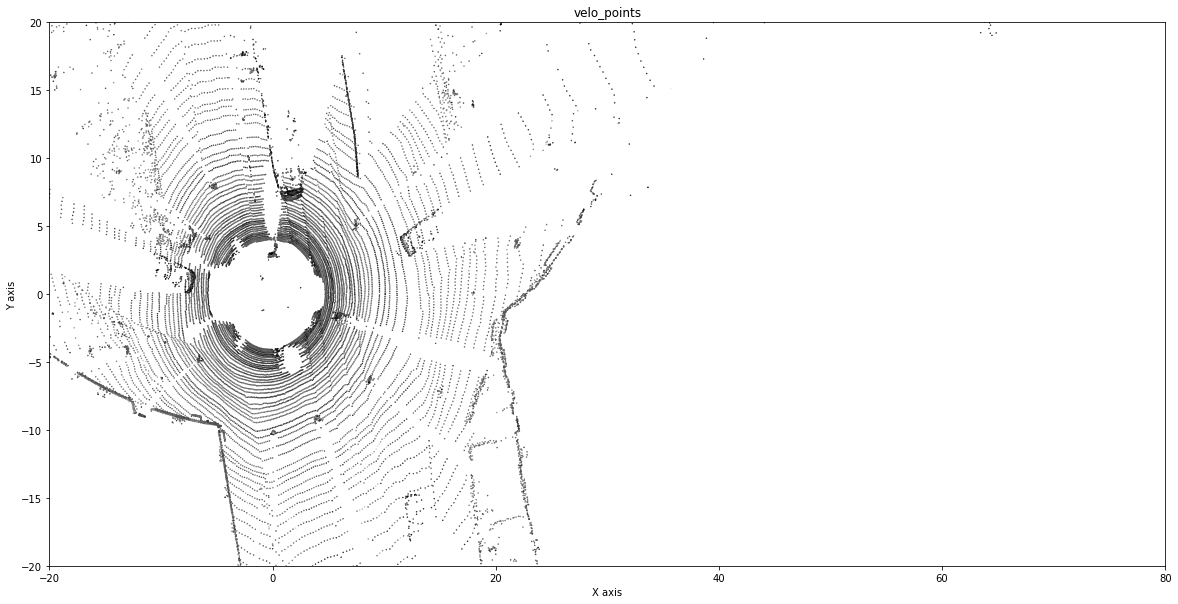

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
draw_point_cloud(ax, point_cloud[::5], "velo_points", axes=[0, 1])

In [8]:
import pandas as pd 
LABEL_NAME = ["frame", "track id", "type", "truncated", "occluded", "alpha", "bbox_left", "bbox_top", "bbox_right", "bbox_bottom", "dimensions_height", "dimensions_width", "dimensions_length", "location_x", "location_y", "location_z", "rotation_y"] 
df = pd.read_csv(os.path.join(BASE_PATH, "label_02/0000.txt"), header=None, sep=" ")
df.columns = LABEL_NAME
df.loc[df.type.isin(['Van','Car','Truck']),'type'] = 'Car'
df = df[df.type.isin(['Car','Cyclist','Pedestrian'])]
df

,frame,track id,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,dimensions_height,dimensions_width,dimensions_length,location_x,location_y,location_z,rotation_y
2,0,0,Car,0,0,-1.793451,296.744956,161.752147,455.226042,292.372804,2.000000,1.823255,4.433886,-4.552284,1.858523,13.410495,-2.115488
3,0,1,Cyclist,0,0,-1.936993,737.619499,161.531951,931.112229,374.000000,1.739063,0.824591,1.785241,1.640400,1.675660,5.776261,-1.675458
4,0,2,Pedestrian,0,0,-2.523309,1106.137292,166.576807,1204.470628,323.876144,1.714062,0.767881,0.972283,6.301919,1.652419,8.455685,-1.900245
7,1,0,Car,0,0,-1.796862,294.898777,156.024256,452.199718,284.621269,2.000000,1.823255,4.433886,-4.650955,1.766774,13.581085,-2.121565
8,1,1,Cyclist,0,0,-1.935205,745.017137,156.393157,938.839722,374.000000,1.739063,0.824591,1.785241,1.700640,1.640419,5.778596,-1.664456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,153,10,Car,0,2,-1.818856,680.294919,177.511028,842.313244,284.070033,1.524000,1.728591,3.894227,2.353367,1.622590,12.436503,-1.637280
1085,153,11,Car,0,2,1.864481,245.920800,194.456182,394.817829,286.444967,1.444000,1.595116,3.791789,-5.458963,1.908188,13.979427,1.497916
1086,153,12,Pedestrian,1,0,0.826456,1185.199080,151.165841,1241.000000,348.552707,1.688000,0.800000,0.884000,5.739732,1.500532,6.279632,1.543272
1087,153,13,Car,0,0,1.773993,344.361560,188.772369,430.531955,248.482384,1.422414,1.512803,3.707634,-6.033258,1.888008,19.788795,1.481180


In [9]:
def compute_3d_box_cam2(h, w, l, x, y, z, yaw):
    # 计算旋转矩阵
    R = np.array([[np.cos(yaw), 0, np.sin(yaw)], [0, 1, 0], [-np.sin(yaw), 0, np.cos(yaw)]])
    # 8个顶点的xyz
    x_corners = [l/2,l/2,-l/2,-l/2,l/2,l/2,-l/2,-l/2]
    y_corners = [0,0,0,0,-h,-h,-h,-h] 
    z_corners = [w/2,-w/2,-w/2,w/2,w/2,-w/2,-w/2,w/2]
    # 旋转矩阵点乘(3，8)顶点矩阵
    corners_3d_cam2 = np.dot(R, np.vstack([x_corners,y_corners,z_corners]))
    # 加上location中心点，得出8个顶点的坐标
    corners_3d_cam2 += np.vstack([x,y,z])
    return corners_3d_cam2

In [10]:
# 计算cam2眼中的3DBox
corners_3d_cam2 = compute_3d_box_cam2(*df.loc[2,['dimensions_height','dimensions_width','dimensions_length','location_x','location_y','location_z','rotation_y']])

In [11]:
corners_3d_cam2.shape

(3, 8)

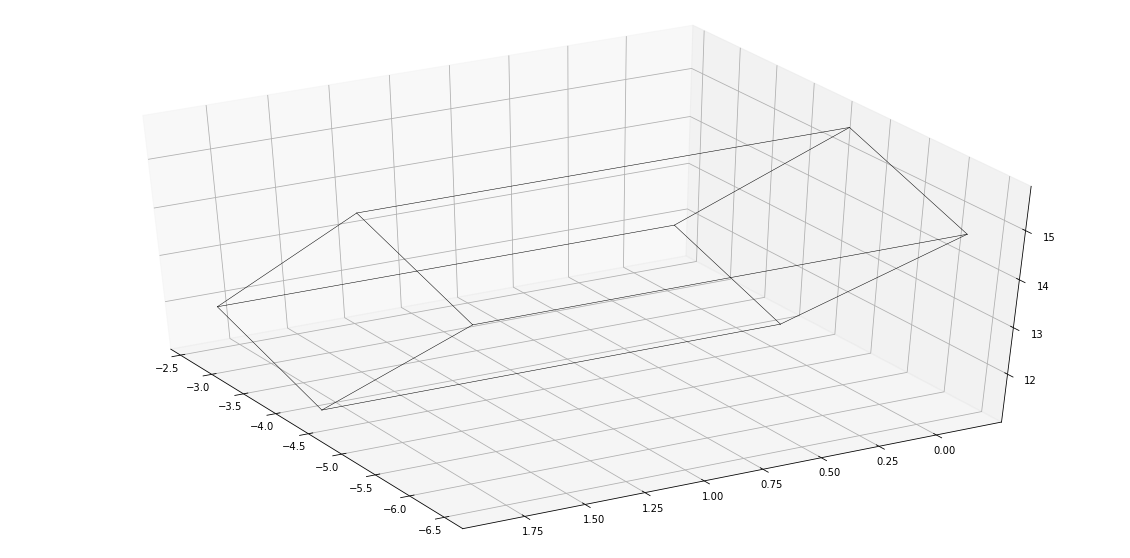

In [12]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')    
ax.view_init(40,150)
draw_box(ax,(corners_3d_cam2))

In [13]:
# https://github.com/charlesq34/frustum-pointnets/edit/master/kitti/kitti_util.py
from kitti_util import *

In [14]:
calib = Calibration("/home/mckros/kitti/RawData/2011_09_26/", from_video=True)

corners_3d_velo = calib.project_rect_to_velo(corners_3d_cam2.T).T
corners_3d_velo

array([[15.12424719, 16.06928938, 12.27779014, 11.33274795, 15.10334837,
        16.04839056, 12.25689133, 11.31184914],
       [ 6.49985556,  4.9406537 ,  2.64287284,  4.2020747 ,  6.47872485,
         4.91952299,  2.62174213,  4.18094399],
       [-1.70710774, -1.71370686, -1.7776097 , -1.77101058,  0.29267156,
         0.28607244,  0.2221696 ,  0.22876872]])

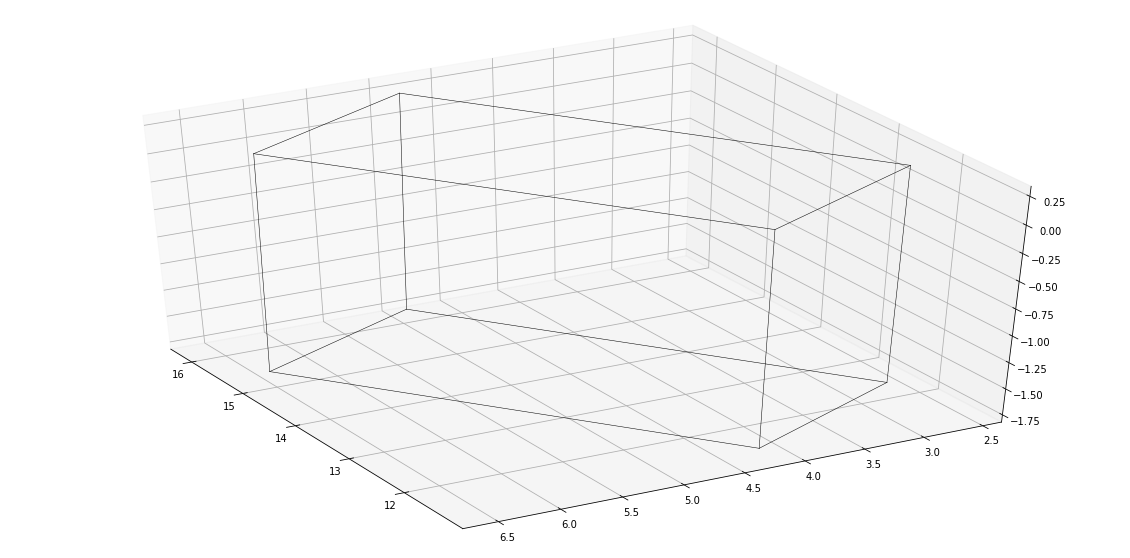

In [15]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(40,150)
draw_box(ax,corners_3d_velo)

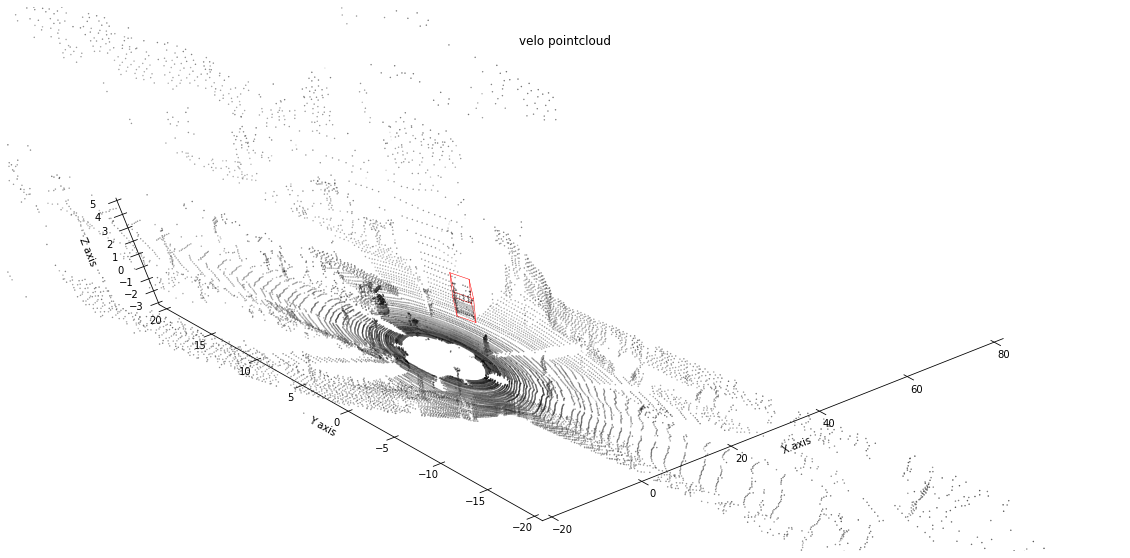

In [16]:
# 和点云做结合
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(70,230)
draw_point_cloud(ax,point_cloud[::5],"velo pointcloud")
draw_box(ax,corners_3d_velo,color='red')

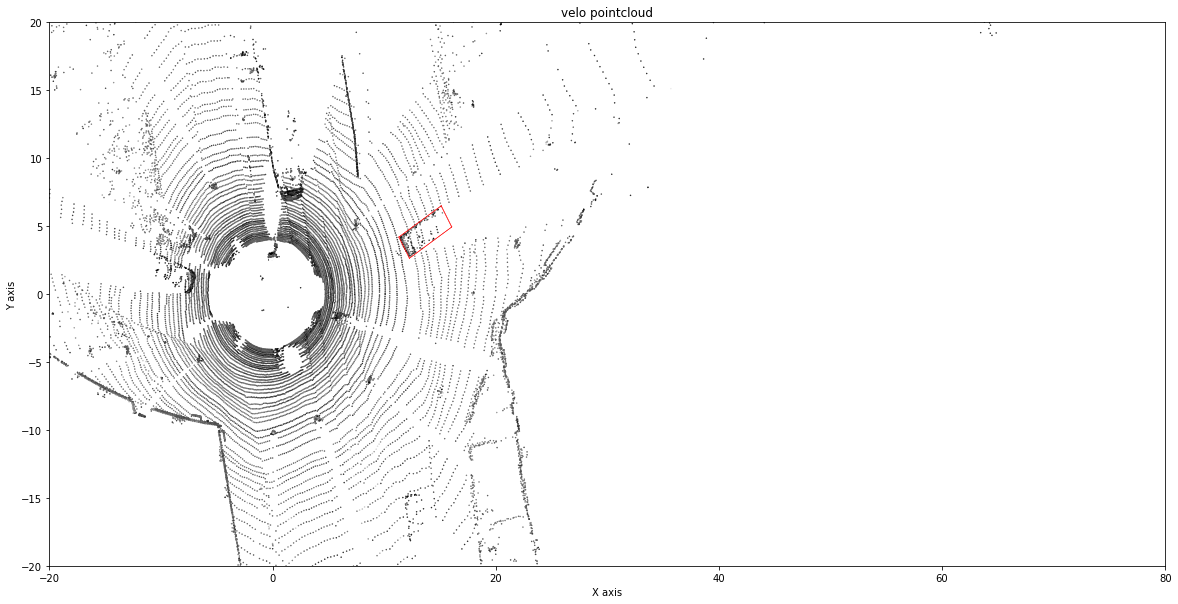

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
draw_point_cloud(ax,point_cloud[::5],"velo pointcloud",axes=[0,1])
draw_box(ax,corners_3d_velo,color='red',axes=[0,1])